<a href="https://colab.research.google.com/github/antonelladamico17/Urban-Sound-Classification/blob/main/Urban_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Antonella D'Amico 961150*

**Machine Learing Project** \\
*Urban Sound Classification with Neural Networks*

## Data Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import librosa #python package for music and audio analysis
import matplotlib.pyplot as plt #we want to display the signals of one of the file
import IPython.display as ipd
import librosa.display
import seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_dataset_path = '/content/drive/MyDrive/UrbanSound8K/audio'

In [ ]:
# metadata file
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')

In this table we can see the file name, in which folder it is saved and the corresponding class. So, for example, audio file name `100032-3-0-0.wav` is classified as a dog bark.

In [ ]:
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


Now we look at the distribution of the dataset, so we check if it is balanced or not.

In [ ]:
metadata['class'].value_counts()

engine_idling       1000
children_playing    1000
air_conditioner     1000
jackhammer          1000
street_music        1000
dog_bark            1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

As we see, we have 10 classes. Most of them are blanced since they contains 1000 samples or 929, on the other hand we have two of them which contain less than 500 samples. Only two classes are imbalanced beacuse of a smaller number of samples.

Text(0.5, 1.0, 'Metadata balancing/imbalancing')

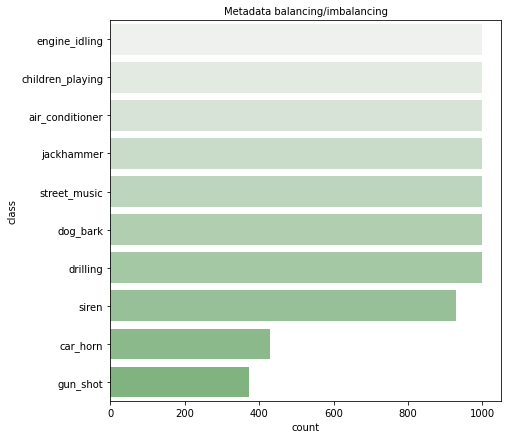

In [ ]:
plt.figure(figsize=(7,7))
seaborn.countplot(y = metadata['class'], 
                  palette= "light:#7B7",
                  order = metadata['class'].value_counts().index)
plt.title('Metadata balancing/imbalancing', fontsize=10)